# Gaussian R-XOR and Gaussian XNOR Experiments: Streaming vs. Batch Forests

In [1]:
import numpy as np
import streaming_synf_functions as fn
from proglearn.sims import generate_gaussian_parity
from proglearn.forest import LifelongClassificationForest


Note: This notebook uses external functions stored in `streaming_synf_functions.py`

## Using the `update_task` function for streaming data

Current standard implementations of decision forests operate in batch mode. In many real world applications, we are not provided with all data at once and therefore need to incrementally update as data arrives. For incrementally updating decision trees we can use the [scikit-learn-stream fork](https://github.com/PSSF23/scikit-learn-stream) with an added `partial_fit` function for incremental learning. Furthermore, for synergistic learning we can use the function `update_task`. When new data, $x$, arrives with labels, $y$, we can update task $t$ as follows:

`synf.update_task(x,y,task_id = t)`

Note that when using `update_task`, the `classes` argument must be provided on the initial call to `add_task`

## Synergistic Learning

The goal of synergistic learning is to improve performance on the current task as well as past and future tasks. This can be accomplished through ensembling independent representations, as is done in both Synergistic Forest implementations. 

The metric of learning efficiency, as described in Vogelstein et al. 2020, can be used to quantify a classifier's learning abilities. 

The **learning efficiency** of an algorithm $f$ for a given task $t$ with sample size $n$ is defined as 
$$\text{LE}^t_n(f):=\frac{\mathbb{E}[R^t(f(\mathbf{S}^t_n))]}{\mathbb{E}[R^t(f(\mathbf{S}_n))]}$$
If $\text{LE}^t_n(f) > 1$, $f$ has learned task $t$ with data $\mathbf{S}_n$

The **forward learning efficiency** of an algorithm $f$ for a given task $t$ with sample size $n$ is defined as 
$$\text{FLE}^t_n(f):=\frac{\mathbb{E}[R^t(f(\mathbf{S}^t_n))]}{\mathbb{E}[R^t(f(\mathbf{S}^{\leq t}_n))]}$$

If $\text{FLE}^t_n(f) > 1$, $f$ has leveraged data from past tasks to improve performance on task $t$

The **backward learning efficiency** of an algorithm $f$ for a given task $t$ with sample size $n$ is defined as 
$$\text{BLE}^t_n(f):=\frac{\mathbb{E}[R^t(f(\mathbf{S}^{\leq t}_n))]}{\mathbb{E}[R^t(f(\mathbf{S}_n))]}$$
If $\text{BLE}^t_n(f) > 1$, $f$ has leveraged data from future tasks to improve performance on previous tasks

An algorithm has **synergistically learned** if $\log\text{LE}^t_n(f) > 0$ for all $t \in \mathcal{T}$ 

Conversely, an algorithm has **catastrophically forgotten** if it has negatively learned for all tasks

## Running the Gaussian XOR experiments

In the following experiments, we compare Decision Forest, Stream Decision Forest, Synergistic Forest, and Stream Synergistic Forest on variations of the Gaussian XOR binary classification task. 

In [6]:
mc_rep = 100
fn.run_gaussian_experiments(mc_rep)

## Load results for plotting

In [ ]:
rxor_mean_errors, xnor_mean_errors, rxor_single_task_errors, xnor_single_task_errors = fn.load_data()
r_xor_transfer_efficiencies = fn.get_mean_te(rxor_mean_errors, rxor_single_task_errors)
xnor_transfer_efficiencies = fn.get_mean_te(xnor_mean_errors, xnor_single_task_errors)

## Gaussian XOR and Gaussian XNOR

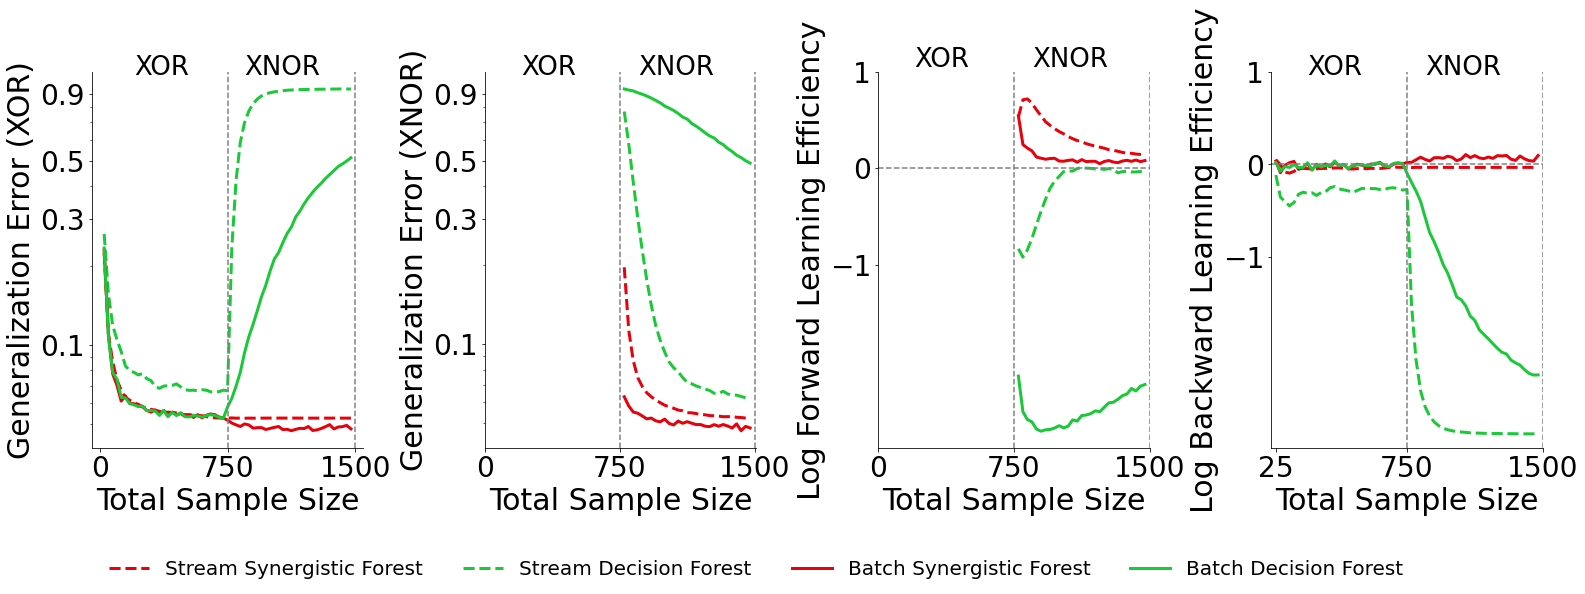

In [3]:
fn.plot_error(np.array(xnor_mean_errors), "XNOR", np.log(xnor_transfer_efficiencies))

## Gaussian XOR and Gaussian R-XOR

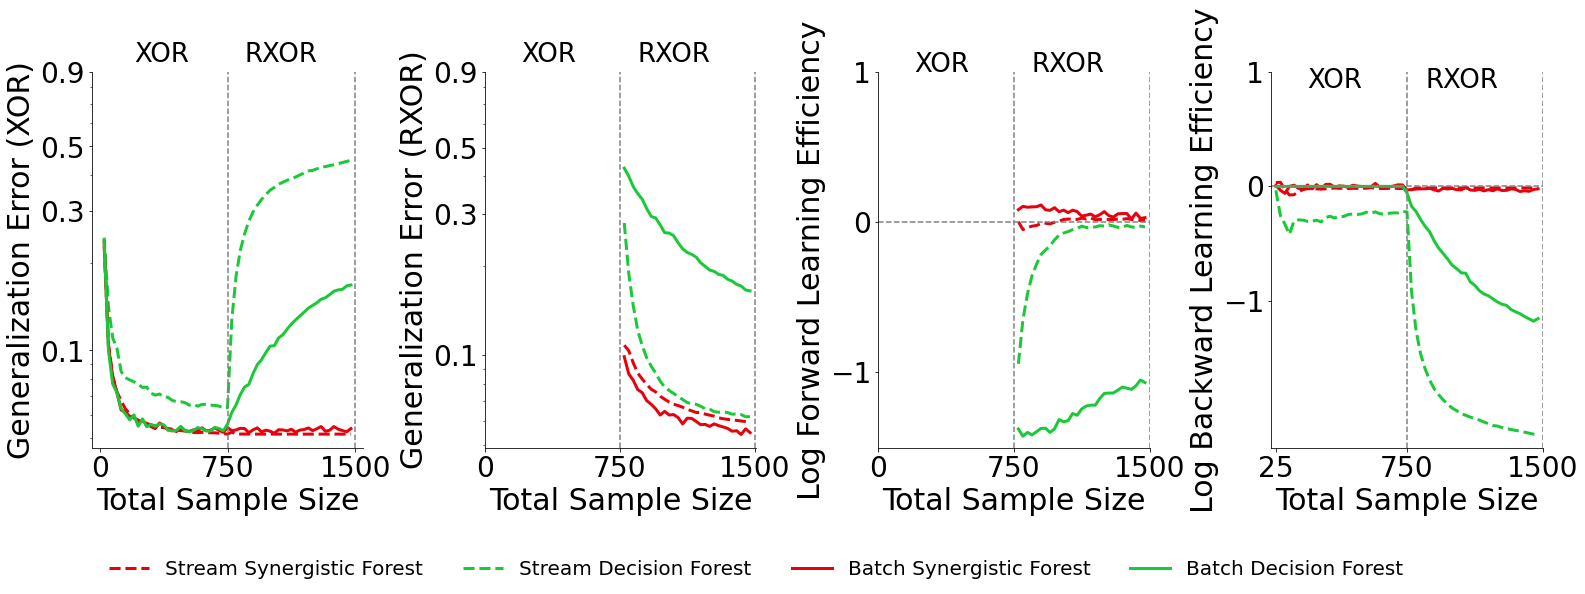

In [4]:
fn.plot_error(np.array(rxor_mean_errors), "RXOR", np.log(r_xor_transfer_efficiencies))

## Work in Progress Backwards Learning Efficiency and Angle of Rotation





In [2]:
angle_sweep = range(0, 90, 2)
task1_sample = 100
task2_sample = 100
mc_rep = 1500  # reduce the number of repetitions for reduced runtime

In [ ]:
fn.stream_ble_v_angle(angle_sweep, task1_sample, task2_sample, mc_rep)

### BLE v Angle (with updated code)
ran smoothly for 10+ hours without error

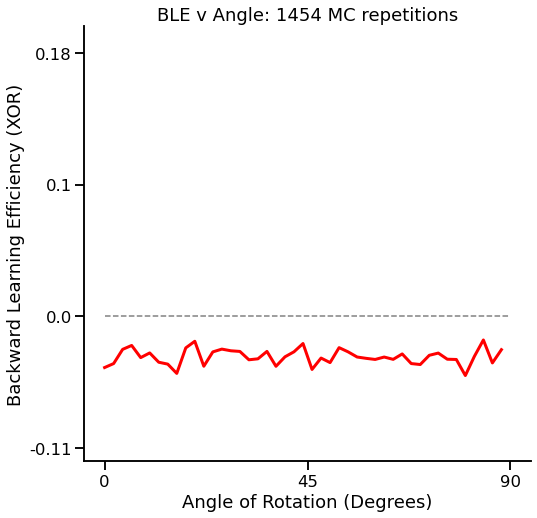

In [21]:
mc_reps, mean_ble = fn.load_ble_v_angle("ble_v_angle/04_20_22.txt")
fn.plot_bte_v_angle(mean_ble, mc_reps)

### BLE v Angle (with code from last week (ie. without classes argument for add_task/transformer))

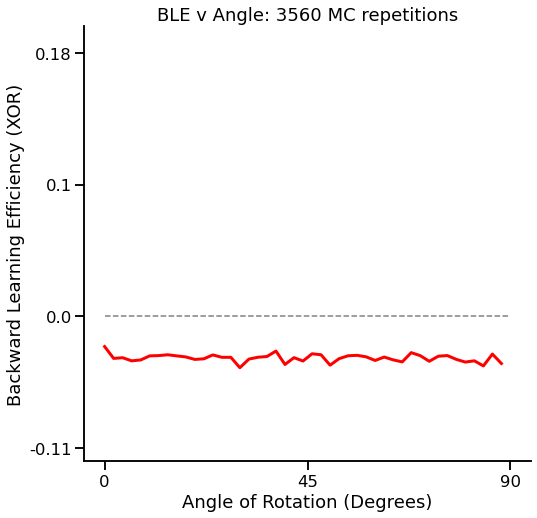

In [22]:
mc_reps, mean_ble = fn.load_ble_v_angle("ble_v_angle/04_13_22.txt")
fn.plot_bte_v_angle(mean_ble, mc_reps)

## Training/Update Samples vs BLE 

In [4]:
task1_samples = [100, 250]
task2_samples = 1500
task2_angle = np.pi/2
update_samples = [10, 25, 50]
mc_rep = 1000

In [ ]:
fn.stream_ble_v_nsamples(task1_samples, task2_samples, task2_angle, update_samples, mc_rep)

In [ ]:
def run_nsamples_w_try_except():
    try:
        fn.stream_ble_v_nsamples(task1_samples, task2_samples, task2_angle, update_samples, mc_rep)
    except ValueError:
        print("Value Error Encountered: restarting experiment")
        run_nsamples_w_try_except()
    except IndexError:
        print("Index Error Encountered: restarting experiment")
        run_nsamples_w_try_except()
run_nsamples_w_try_except()

## BLE V num samples & update samples (code from last week)

Text(0.5, 1.0, 'BLE v Num Samples & Num update samples (230 MC reps)')

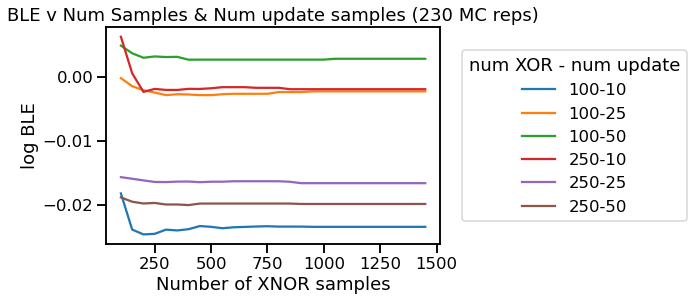

In [32]:
import numpy as np
import matplotlib.pyplot as plt 
def load_ble_v_nsamples():
    return [np.loadtxt('ble_v_nsamples/t1-100_u-10_t2-1500_xnor.csv').mean(axis=0),
    np.loadtxt('ble_v_nsamples/t1-100_u-25_t2-1500_xnor.csv').mean(axis=0),
    np.loadtxt('ble_v_nsamples/t1-100_u-50_t2-1500_xnor.csv').mean(axis=0),
    np.loadtxt('ble_v_nsamples/t1-250_u-10_t2-1500_xnor.csv').mean(axis=0),
    np.loadtxt('ble_v_nsamples/t1-250_u-25_t2-1500_xnor.csv').mean(axis=0),
    np.loadtxt('ble_v_nsamples/t1-250_u-50_t2-1500_xnor.csv').mean(axis=0)
    ]

ble_nsamples = load_ble_v_nsamples()
labels = ["100-10", "100-25", "100-50", "250-10", "250-25", "250-50"]
for i, mean_ble in enumerate(ble_nsamples): 
    plt.plot(np.arange(100,1500,50),np.log(mean_ble[1:-1]), label = labels[i])
plt.legend(bbox_to_anchor=(1.04,0.5), loc = "center left", title ="num XOR - num update")
plt.ylabel("log BLE")
plt.xlabel("Number of XNOR samples")
plt.title("BLE v Num Samples & Num update samples (230 MC reps)")


## BLE v num samples for 5000 XNOR samples

C:\Users\nickh\AppData\Local\Temp/ipykernel_3144/951883656.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(0,5000,step=50),np.log(row), label = task1_samples[i])
C:\Users\nickh\AppData\Local\Temp/ipykernel_3144/951883656.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(0,5000,step=50),np.log(row), label = task1_samples[i])


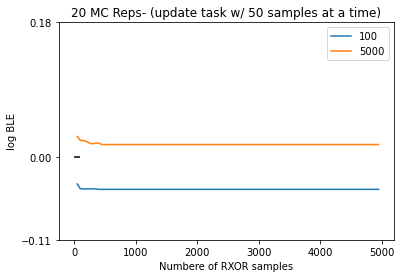

In [58]:
for i,row in enumerate(mean_ble):
    plt.plot(np.arange(0,5000,step=50),np.log(row), label = task1_samples[i])
plt.hlines(0, 0, 90, color = "k")
plt.yticks([-0.11, 0 , 0.18])
plt.xlabel("Numbere of RXOR samples")
plt.ylabel("log BLE")
plt.title("20 MC Reps- (update task w/ 50 samples at a time)")
plt.legend()
#fn.write_result("ble_v_nsamples/20_mc_rep_100_5000_5000_xnor.txt",mean_ble)